100
max width: Domain(width=3.6, kappa=1.031e-05)
min width: Domain(width=3.01, kappa=-1.031e-05)


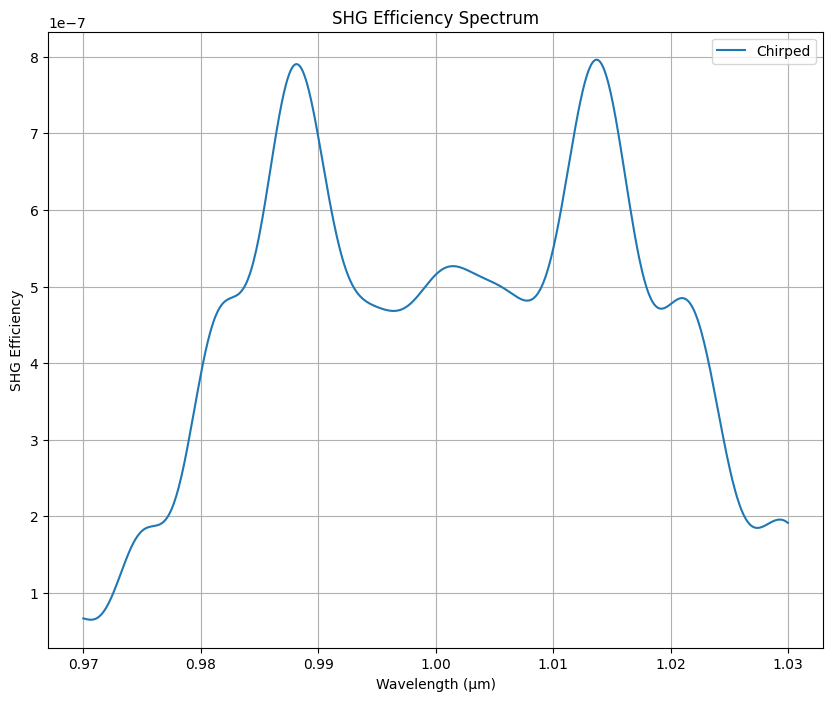

In [2]:
from syuron import shg
from syuron import mgoslt
import jax.numpy as jnp
import matplotlib.pyplot as plt


domain_stack = mgoslt.use_chirped(655, 7.2, 1.031E-05, 0.0003)
print(len(domain_stack))
print(f"max width: {domain_stack[0]}")
print(f"min width: {domain_stack[len(domain_stack) - 1]}")

wavelength_dim = jnp.linspace(0.97, 1.03, 1000).tolist()

params = shg.Params(
    domain_stack_dim=domain_stack,
    T_dim=70,
    wavelength_dim=wavelength_dim,
    fund_power_dim=1,
    sh_power_dim=0,
    mesh_density=100
)

eff_tensor = shg.analyze(params, mgoslt.use_material)

plt.figure(figsize=(10, 8))
plt.plot(wavelength_dim, eff_tensor[0, 0, :, 0, 0], label="Chirped")
plt.xlabel("Wavelength (μm)")
plt.ylabel("SHG Efficiency")
plt.title("SHG Efficiency Spectrum")
plt.legend()
plt.grid(True)
plt.show()

データセットの入力の作成完了
計算が終了


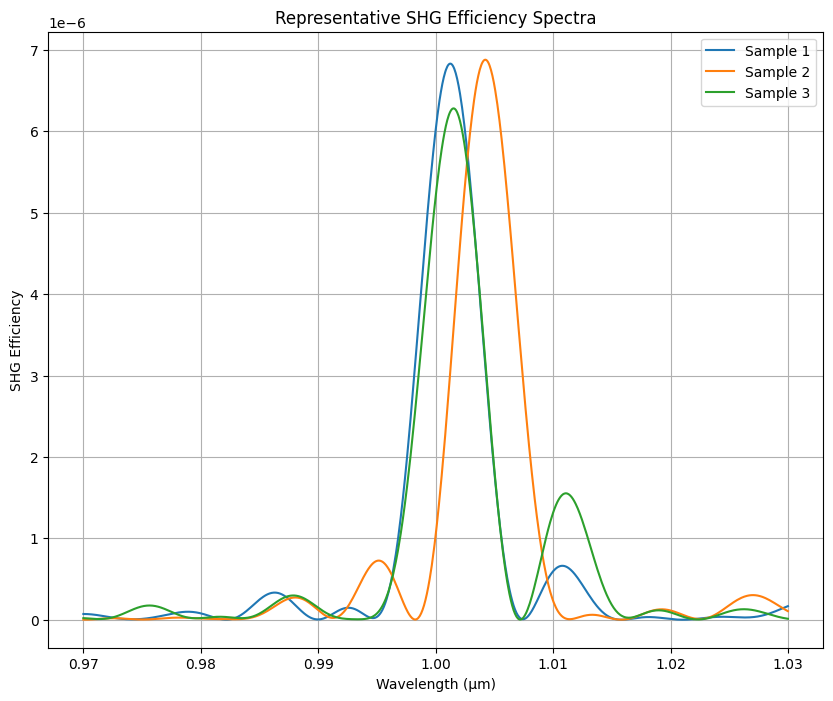

In [ ]:
from syuron import shg
import jax.numpy as jnp
import matplotlib.pyplot as plt
import random
import json


def create_random_domain_stack(num_domains: int, kappa_val: float) -> list:
    domains = []
    for i in range(num_domains):
        width = round(random.uniform(3, 3.6), 2)  # 3〜3.6のランダムな数字（小数点以下2桁）
        kappa = kappa_val if i % 2 == 0 else -kappa_val  # インデックスに応じた符号
        domains.append(shg.Domain(width, kappa))
    return domains


num_samples = 10000    # 全サンプル数
num_domains = 100     # 各domain_stackのドメイン数
kappa_val = 1.31e-05   # 固定のkappa値

# すべてのサンプルについて、domain_stackを生成しリストに格納
all_domain_stacks = [create_random_domain_stack(
    num_domains, kappa_val) for _ in range(num_samples)]

print("データセットの入力の作成完了")

wavelength_dim = jnp.linspace(0.97, 1.03, 1000).tolist()

params = shg.Params(
    domain_stack_dim=all_domain_stacks,
    T_dim=70,
    wavelength_dim=wavelength_dim,
    fund_power_dim=1,
    sh_power_dim=0,
    mesh_density=100
)

eff_tensor = shg.analyze(params, mgoslt.use_material)

print("計算が終了")

dataset = []
for i in range(num_samples):
    # JSON保存可能な形に変換（各domainを辞書に）
    input_domains = [d.width for d in all_domain_stacks[i]]
    # i番目のサンプルの効率スペクトルを取得
    efficiency_spectrum = eff_tensor[i, 0, :, 0, 0].tolist()
    dataset.append({
        "input": input_domains,
        "output": efficiency_spectrum
    })

with open("dataset.json", "w") as f:
    json.dump(dataset, f)

plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(wavelength_dim, dataset[i]["output"], label=f"Sample {i+1}")

plt.xlabel("Wavelength (μm)")
plt.ylabel("SHG Efficiency")
plt.title("Representative SHG Efficiency Spectra")
plt.legend()
plt.grid(True)
plt.show()